# Neural Benchmark Tutorial

Every neural benchmark has two key components:
1. Neural Data (that is stored in a `NeuroidAssembly` or `NeuralRecordingAssembly` object)
2. Metric - which defines how we want to compare the model measurements against the experimental data.


The data has two key components:
1. StimulusSet (subclass of pandas) - basically a master sheet which references which stimulus to present and where to find it.
2. DataAssembly (subclass of xarray) - the experimental data.
These are packaged into a `BehaviorAssembly object`.

The StimulusSet has two key components:
1. CSV
2. Zipped folder containing the stimulus data.

The most substantial difference between BehavioralAssemblies and Neur-Assemblies is the presence of extra dimensions. These dimensions are typically `presentation`, `neuroid`, and `time_bin`.

The `presentation` dimensions refers to the presentation of stimuli with metadata.

The `neuroid` dimension contains information about the neural recording sites, such as the animal, region, and location of the electrodes.

The `time_bin` dimension tells us about the time in milliseconds from when the neural responses were collected.


## Data Requirements

In [2]:
import brainscore_vision
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/envs/benchmark/lib/python3.11/site-packages/brainscore_core/metrics/__init__.py:16: FutureWarning: xarray subclass Score should explicitly define __slots__
  class Score(DataAssembly):


### Load the data

The `load_dataset` function will load the StimulusSet and DataAssembly to your `.brainio` folder.

In [3]:
# Here the data identifier can be used to easily load the data.
neural_data = brainscore_vision.load_dataset("MajajHong2015.public")
neural_data

brainscore-storage/brainio-brainscore/assy_dicarlo_MajajHong2015_public.nc: 100%|██████████| 165M/165M [00:06<00:00, 24.5MB/s] 
brainscore-storage/brainio-brainscore/stimulus_hvm-public.csv: 100%|██████████| 1.33M/1.33M [00:00<00:00, 3.81MB/s]
brainscore-storage/brainio-brainscore/stimulus_hvm-public.zip: 100%|██████████| 132M/132M [00:02<00:00, 48.8MB/s] 


<xarray.NeuronRecordingAssembly 'dicarlo.MajajHong2015.public' (neuroid: 256,
                                                                presentation: 148480,
                                                                time_bin: 1)>
dask.array<open_dataset-901f046c58c1d395f1aadc99bd12e8cddicarlo.MajajHong2015.public, shape=(256, 148480, 1), dtype=float32, chunksize=(256, 148480, 1), chunktype=numpy.ndarray>
Coordinates:
  * neuroid          (neuroid) MultiIndex
  - neuroid_id       (neuroid) object 'Chabo_L_M_5_9' ... 'Tito_L_M_8_0'
  - arr              (neuroid) object 'M' 'M' 'M' 'M' 'M' ... 'M' 'M' 'M' 'M'
  - col              (neuroid) int64 9 9 8 9 8 8 7 7 5 6 ... 1 0 1 0 1 0 0 1 1 0
  - hemisphere       (neuroid) object 'L' 'L' 'L' 'L' 'L' ... 'L' 'L' 'L' 'L'
  - subregion        (neuroid) object 'cIT' 'cIT' 'cIT' ... 'pIT' 'pIT' 'pIT'
  - animal           (neuroid) object 'Chabo' 'Chabo' 'Chabo' ... 'Tito' 'Tito'
  - y                (neuroid) float64 0.2 0.6 0.2 1.0 0.6 ... 1.0 1.0 1.8 1.4
  - x                (neuroid) float64 1.8 1.8 1.4 1.8 ... -1.8 -1.4 -1.4 -1.8
  - region           (neuroid) object 'IT' 'IT' 'IT' 'IT' ... 'IT' 'IT' 'IT'
  - row              (neuroid) int64 5 6 5 7 6 7 9 7 9 8 ... 4 4 5 5 6 6 7 7 9 8
  * presentation     (presentation) MultiIndex
  - image_id         (presentation) object '8a72e2bfdb8c267b57232bf96f069374d...
  - repetition       (presentation) int64 0 18 18 18 18 18 ... 16 16 16 17 17 17
  - stimulus         (presentation) int64 0 426 427 428 429 ... 2569 2566 0 1 2
  - stimulus_id      (presentation) object '8a72e2bfdb8c267b57232bf96f069374d...
  - id               (presentation) int64 1 418 419 420 421 ... 3197 641 642 643
  - background_id    (presentation) object 'ecd40f3f6d7a4d6d88134d648884e0b9b...
  - s                (presentation) float64 1.0 1.0 1.0 ... 1.246 1.296 0.9114
  - image_file_name  (presentation) object 'astra_rx+00.000_ry+00.000_rz+00.0...
  - filename         (presentation) object 'astra_rx+00.000_ry+00.000_rz+00.0...
  - rxy              (presentation) float64 -0.0 -0.0 -0.0 ... 0.02724 -10.4
  - tz               (presentation) float64 0.0 0.0 0.0 ... -0.269 -0.599 0.211
  - category_name    (presentation) object 'Cars' 'Faces' ... 'Fruits' 'Fruits'
  - rxz_semantic     (presentation) float64 0.0 0.0 0.0 ... 13.22 -2.621 -14.72
  - ty               (presentation) float64 0.0 0.0 0.0 ... -0.191 -0.213 0.277
  - ryz              (presentation) float64 -0.0 -0.0 -0.0 ... -16.89 -0.2055
  - object_name      (presentation) object 'car_astra' 'face0' ... 'apple'
  - variation        (presentation) int64 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3
  - size             (presentation) float64 256.0 256.0 256.0 ... 256.0 256.0
  - rxy_semantic     (presentation) float64 90.0 -0.0 -0.0 ... 0.02724 -10.4
  - ryz_semantic     (presentation) float64 -0.0 -0.0 -0.0 ... -16.89 -0.2055
  - rxz              (presentation) float64 0.0 0.0 0.0 ... 13.22 -2.621 -14.72
  * time_bin         (time_bin) MultiIndex
  - time_bin_start   (time_bin) int64 70
  - time_bin_end     (time_bin) int64 170
Attributes:
    stimulus_set_identifier:  hvm-public
    stimulus_set:                     id                             backgrou...
    identifier:               dicarlo.MajajHong2015.public

In [4]:
# We rearrange the dimensions so that `presentation` is the first dimension, `neuroid` is the second dimension, and `time_bin` is the third dimension.
# This makes it easier to interact with the data.
neural_data = neural_data.transpose('presentation', 'neuroid', 'time_bin')
neural_data

<xarray.NeuronRecordingAssembly 'dicarlo.MajajHong2015.public' (
                                                                presentation: 148480,
                                                                neuroid: 256,
                                                                time_bin: 1)>
dask.array<transpose, shape=(148480, 256, 1), dtype=float32, chunksize=(148480, 256, 1), chunktype=numpy.ndarray>
Coordinates:
  * neuroid          (neuroid) MultiIndex
  - neuroid_id       (neuroid) object 'Chabo_L_M_5_9' ... 'Tito_L_M_8_0'
  - arr              (neuroid) object 'M' 'M' 'M' 'M' 'M' ... 'M' 'M' 'M' 'M'
  - col              (neuroid) int64 9 9 8 9 8 8 7 7 5 6 ... 1 0 1 0 1 0 0 1 1 0
  - hemisphere       (neuroid) object 'L' 'L' 'L' 'L' 'L' ... 'L' 'L' 'L' 'L'
  - subregion        (neuroid) object 'cIT' 'cIT' 'cIT' ... 'pIT' 'pIT' 'pIT'
  - animal           (neuroid) object 'Chabo' 'Chabo' 'Chabo' ... 'Tito' 'Tito'
  - y                (neuroid) float64 0.2 0.6 0.2 1.0 0.6 ... 1.0 1.0 1.8 1.4
  - x                (neuroid) float64 1.8 1.8 1.4 1.8 ... -1.8 -1.4 -1.4 -1.8
  - region           (neuroid) object 'IT' 'IT' 'IT' 'IT' ... 'IT' 'IT' 'IT'
  - row              (neuroid) int64 5 6 5 7 6 7 9 7 9 8 ... 4 4 5 5 6 6 7 7 9 8
  * presentation     (presentation) MultiIndex
  - image_id         (presentation) object '8a72e2bfdb8c267b57232bf96f069374d...
  - repetition       (presentation) int64 0 18 18 18 18 18 ... 16 16 16 17 17 17
  - stimulus         (presentation) int64 0 426 427 428 429 ... 2569 2566 0 1 2
  - stimulus_id      (presentation) object '8a72e2bfdb8c267b57232bf96f069374d...
  - id               (presentation) int64 1 418 419 420 421 ... 3197 641 642 643
  - background_id    (presentation) object 'ecd40f3f6d7a4d6d88134d648884e0b9b...
  - s                (presentation) float64 1.0 1.0 1.0 ... 1.246 1.296 0.9114
  - image_file_name  (presentation) object 'astra_rx+00.000_ry+00.000_rz+00.0...
  - filename         (presentation) object 'astra_rx+00.000_ry+00.000_rz+00.0...
  - rxy              (presentation) float64 -0.0 -0.0 -0.0 ... 0.02724 -10.4
  - tz               (presentation) float64 0.0 0.0 0.0 ... -0.269 -0.599 0.211
  - category_name    (presentation) object 'Cars' 'Faces' ... 'Fruits' 'Fruits'
  - rxz_semantic     (presentation) float64 0.0 0.0 0.0 ... 13.22 -2.621 -14.72
  - ty               (presentation) float64 0.0 0.0 0.0 ... -0.191 -0.213 0.277
  - ryz              (presentation) float64 -0.0 -0.0 -0.0 ... -16.89 -0.2055
  - object_name      (presentation) object 'car_astra' 'face0' ... 'apple'
  - variation        (presentation) int64 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3
  - size             (presentation) float64 256.0 256.0 256.0 ... 256.0 256.0
  - rxy_semantic     (presentation) float64 90.0 -0.0 -0.0 ... 0.02724 -10.4
  - ryz_semantic     (presentation) float64 -0.0 -0.0 -0.0 ... -16.89 -0.2055
  - rxz              (presentation) float64 0.0 0.0 0.0 ... 13.22 -2.621 -14.72
  * time_bin         (time_bin) MultiIndex
  - time_bin_start   (time_bin) int64 70
  - time_bin_end     (time_bin) int64 170
Attributes:
    stimulus_set_identifier:  hvm-public
    stimulus_set:                     id                             backgrou...
    identifier:               dicarlo.MajajHong2015.public

<img src="./assets/neural_brainio.png" width="750">

We can navigate to the folder to see the data or we can just reference the `behavior_data` object.

In this Ferguson2024 dataset, the data is stored in a behaviorAssembly.

This BehaviorAssembly is made up a DataAssembly and a StimulusSet. The DatAssembly is stored within the `data` dimension, and the StimulusSet is stored in the `attrs` dictionary. The StimulusSet is a subclass of pandas and is essentially a 2D dataframe, and the DataAssembly is a subclass of xarray.

Within the `data` dimension, we have 4292 presentations, which refers to the presentation of a stimulus to a subject. Te values in this case then correspond to the responses of subjects to the stimuli.


In [5]:
print(f"The type of the StimulusSet is {type(neural_data.attrs['stimulus_set'])}")
print(f"The type of the DataAssembly is {type(neural_data)}")

The type of the StimulusSet is <class 'brainio.stimuli.StimulusSet'>
The type of the DataAssembly is <class 'brainio.assemblies.NeuronRecordingAssembly'>


### StimulusSet

#### We can also access the StimulusSet directly from the `neural_data` object.

In [6]:
# behavior_data.stimulus_set[:10] also achieves the same result
neural_data.attrs['stimulus_set'][:10]

,id,background_id,s,image_id,image_file_name,filename,rxy,tz,category_name,rxz_semantic,ty,ryz,object_name,variation,size,rxy_semantic,ryz_semantic,rxz,stimulus_id
0,1,ecd40f3f6d7a4d6d88134d648884e0b9b364efc9,1.0,8a72e2bfdb8c267b57232bf96f069374d5b21832,astra_rx+00.000_ry+00.000_rz+00.000_tx+00.000_...,astra_rx+00.000_ry+00.000_rz+00.000_tx+00.000_...,-0.0,0.0,Cars,0.0,0.0,-0.0,car_astra,0,256.0,90.0,-0.0,0.0,8a72e2bfdb8c267b57232bf96f069374d5b21832
1,2,006d66c207c6417574f62f0560c6b2b40a9ec5a1,1.0,27f69468c9d6019ed0d22b9583c94c5b58198c1c,_12_rx+00.000_ry+00.000_rz+00.000_tx+00.000_ty...,_12_rx+00.000_ry+00.000_rz+00.000_tx+00.000_ty...,-0.0,0.0,Tables,0.0,0.0,-0.0,table3,0,256.0,-0.0,-0.0,0.0,27f69468c9d6019ed0d22b9583c94c5b58198c1c
2,3,3b3c1d65865028d0fad0b0bf8f305098db717e7f,1.0,6af1cbb28aacea6c582faa07e92d8325fa7a29d7,face0003_rx+00.000_ry+00.000_rz+00.000_tx+00.0...,face0003_rx+00.000_ry+00.000_rz+00.000_tx+00.0...,-0.0,0.0,Faces,0.0,0.0,-0.0,face2,0,256.0,-0.0,-0.0,0.0,6af1cbb28aacea6c582faa07e92d8325fa7a29d7
3,4,687ade2f9ee4d52af9705865395471a24ba38d5f,1.0,d0f7a45b377d4920c3466ec7a20dce9437a150d6,walnut_obj_rx-90.000_ry+00.000_rz+00.000_tx+00...,walnut_obj_rx-90.000_ry+00.000_rz+00.000_tx+00...,-0.0,0.0,Fruits,0.0,0.0,-0.0,walnut,0,256.0,-0.0,-0.0,0.0,d0f7a45b377d4920c3466ec7a20dce9437a150d6
4,5,724e5703cc42aa2c3ff135e3508038a90e4ebcb3,1.0,d4c3b4d4aefd29fd168a2c3c9a9962d99653a715,walnut_obj_rx-90.000_ry+00.000_rz+00.000_tx+00...,walnut_obj_rx-90.000_ry+00.000_rz+00.000_tx+00...,-0.0,0.0,Fruits,0.0,0.0,-0.0,walnut,0,256.0,-0.0,-0.0,0.0,d4c3b4d4aefd29fd168a2c3c9a9962d99653a715
5,6,d6399fdb5cfe58a1c1908762cfe82406e2510231,1.0,c6fb4f35719f0f205f5ad65f4fd2794212c5d139,sopwith_rx+00.000_ry+00.000_rz+00.000_tx+00.00...,sopwith_rx+00.000_ry+00.000_rz+00.000_tx+00.00...,-0.0,0.0,Planes,0.0,0.0,-0.0,airplane7,0,256.0,90.0,-0.0,0.0,c6fb4f35719f0f205f5ad65f4fd2794212c5d139
6,7,7b44fb43755d315da8e94d73a1ab04e5db592a04,1.0,ae2b8aac003c867a772647197dcd3c050b75a06e,Apricot_obj_rx-90.000_ry+00.000_rz+00.000_tx+0...,Apricot_obj_rx-90.000_ry+00.000_rz+00.000_tx+0...,-0.0,0.0,Fruits,0.0,0.0,-0.0,apricot,0,256.0,-0.0,-0.0,0.0,ae2b8aac003c867a772647197dcd3c050b75a06e
7,8,03f46b6acdb2fc42f934c5ef67792026de49d530,1.0,a7a31e65e2770c7a503988835c24aeab689abf47,Strawberry_obj_rx-90.000_ry+00.000_rz+00.000_t...,Strawberry_obj_rx-90.000_ry+00.000_rz+00.000_t...,-0.0,0.0,Fruits,0.0,0.0,-0.0,strawberry,0,256.0,-0.0,-0.0,0.0,a7a31e65e2770c7a503988835c24aeab689abf47
8,9,0e3b948ff7c95fcdd6bd07dc0d74b8e2c6ea0e25,1.0,09d2924723bc4677df666072b6e25e988d5f0668,face0002_rx+00.000_ry+00.000_rz+00.000_tx+00.0...,face0002_rx+00.000_ry+00.000_rz+00.000_tx+00.0...,-0.0,0.0,Faces,0.0,0.0,-0.0,face1,0,256.0,-0.0,-0.0,0.0,09d2924723bc4677df666072b6e25e988d5f0668
9,10,2164801f3646e5e82eaa4373f8d249ce17edf1ac,1.0,1df484a50ff7fbd85112990b7f8fe616c49adb28,junkers88_rx+00.000_ry+00.000_rz+00.000_tx+00....,junkers88_rx+00.000_ry+00.000_rz+00.000_tx+00....,-0.0,0.0,Planes,0.0,0.0,-0.0,airplane4,0,256.0,90.0,-0.0,0.0,1df484a50ff7fbd85112990b7f8fe616c49adb28


### StimulusSet Data
#### We can also access the stimulus data using information directly from the `behavior_data` object.

More information: [`get_stimulus()`](https://github.com/brain-score/brainio/blob/acff11f170c4486704af68bb893a887b6cbd3f9d/brainio/stimuli.py#L18)

This is a function that will retrieve the local path to the stimulus data.

Displaying the stimulus for stimulus_id: 8a72e2bfdb8c267b57232bf96f069374d5b21832
The path to the stimulus is /Users/kartik/.brainio/stimulus_hvm-public/astra_rx+00.000_ry+00.000_rz+00.000_tx+00.000_ty+00.000_s+01.000_ecd40f3f6d7a4d6d88134d648884e0b9b364efc9_256x256.png


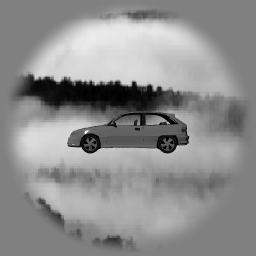

In [7]:
# We want to display the stimulus for the first stimulus in the StimulusSet
stimulus_id = neural_data.attrs['stimulus_set'].stimulus_id[0]
print(f"Displaying the stimulus for stimulus_id: {stimulus_id}")
stimulus_path = neural_data.attrs['stimulus_set'].get_stimulus(stimulus_id)
print(f"The path to the stimulus is {stimulus_path}")
Image.open(stimulus_path)

### DataAssembly

#### The preferred way is to interact directly with the `neural_data` object via the coordinates.

`neural_data[{coordinate_name}]`

In [8]:
neural_data['stimulus_id'].values


array(['8a72e2bfdb8c267b57232bf96f069374d5b21832',
       'b531d7dfc461ab0bc9558773135e6cc1ccbe5b5c',
       'ac1db6c2528dd94f07c1ae56b404d73995b5329f', ...,
       'c93558c6047ec758e8fa57f7283f5c61402ff783',
       'c41c369d7cde564cdb841d66c69cd8ffe025dc12',
       '6b834433a431c9e59c1cd0f0c3af79aa6093dfcb'], dtype=object)

In [9]:
print(f"The number of unique stimuli: {len(set(neural_data['stimulus_id'].values))}")
print(f"The number of unique category_name: {len(set(neural_data['category_name'].values))}")
print(f"The number of observations: {len(neural_data)}")

The number of unique stimuli: 3200
The number of unique category_name: 8
The number of observations: 148480


In [10]:
neural_data.coords

Coordinates:
  * neuroid          (neuroid) MultiIndex
  - neuroid_id       (neuroid) object 'Chabo_L_M_5_9' ... 'Tito_L_M_8_0'
  - arr              (neuroid) object 'M' 'M' 'M' 'M' 'M' ... 'M' 'M' 'M' 'M'
  - col              (neuroid) int64 9 9 8 9 8 8 7 7 5 6 ... 1 0 1 0 1 0 0 1 1 0
  - hemisphere       (neuroid) object 'L' 'L' 'L' 'L' 'L' ... 'L' 'L' 'L' 'L'
  - subregion        (neuroid) object 'cIT' 'cIT' 'cIT' ... 'pIT' 'pIT' 'pIT'
  - animal           (neuroid) object 'Chabo' 'Chabo' 'Chabo' ... 'Tito' 'Tito'
  - y                (neuroid) float64 0.2 0.6 0.2 1.0 0.6 ... 1.0 1.0 1.8 1.4
  - x                (neuroid) float64 1.8 1.8 1.4 1.8 ... -1.8 -1.4 -1.4 -1.8
  - region           (neuroid) object 'IT' 'IT' 'IT' 'IT' ... 'IT' 'IT' 'IT'
  - row              (neuroid) int64 5 6 5 7 6 7 9 7 9 8 ... 4 4 5 5 6 6 7 7 9 8
  * presentation     (presentation) MultiIndex
  - image_id         (presentation) object '8a72e2bfdb8c267b57232bf96f069374d...
  - repetition       (presentatio

In [11]:
df = neural_data.to_dataframe()
df

dicarlo.MajajHong2015.public
image_id                                 repetition stimulus stimulus_id                              id  background_id                            s        image_file_name                                    filename                                           rxy        tz    category_name rxz_semantic ty    ryz       object_name variation size  rxy_semantic ryz_semantic rxz        neuroid_id    arr col hemisphere subregion animal y   x    region row time_bin_start time_bin_end                              
8a72e2bfdb8c267b57232bf96f069374d5b21832 0          0        8a72e2bfdb8c267b57232bf96f069374d5b21832 1   ecd40f3f6d7a4d6d88134d648884e0b9b364efc9 1.000000 astra_rx+00.000_ry+00.000_rz+00.000_tx+00.000_t... astra_rx+00.000_ry+00.000_rz+00.000_tx+00.000_t... -0.000000  0.000 Cars           0.000000    0.000 -0.000000 car_astra   0         256.0  90.000000   -0.000000     0.000000  Chabo_L_M_5_9 M   9   L          cIT       Chabo  0.2  1.8 IT     5   70             170                               0.060929
                                                                                                                                                                                                                                                                                                                                                                                               Chabo_L_M_6_9 M   9   L          cIT       Chabo  0.6  1.8 IT     6   70             170                              -0.725592
                                                                                                                                                                                                                                                                                                                                                                                               Chabo_L_M_5_8 M   8   L          cIT       Chabo  0.2  1.4 IT     5   70             170                               0.420318
                                                                                                                                                                                                                                                                                                                                                                                               Chabo_L_M_7_9 M   9   L          cIT       Chabo  1.0  1.8 IT     7   70             170                               0.640482
                                                                                                                                                                                                                                                                                                                                                                                               Chabo_L_M_6_8 M   8   L          cIT       Chabo  0.6  1.4 IT     6   70             170                              -1.247330
...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        ...
6b834433a431c9e59c1cd0f0c3af79aa6093dfcb 17         2        6b834433a431c9e59c1cd0f0c3af79aa6093dfcb 643 dd611f4df5e53376da5d45c79a2ea0f886814c09 0.911429 Apple_Fruit_obj_rx-107.960_ry+34.497_rz+35.639_... Apple_Fruit_obj_rx-107.960_ry+34.497_rz+35.639_... -10.402834 0.211 Fruits        -14.722092   0.277 -0.205543 apple       3         256.0 -10.402834   -0.205543    -14.722092 Tito_L_M_6_

#### As we can see, unlike the BehaviorAssembly, the NeuralRecordingAssembly/NeuroidAssembly is a 3D array which makes it much harder to convert to a 2D array.

Xarray/BrainIO provides many functions to help interact with the data.

In [12]:
IT_data = neural_data.sel(region='IT')
IT_data

<xarray.NeuronRecordingAssembly 'dicarlo.MajajHong2015.public' (
                                                                presentation: 148480,
                                                                neuroid: 168,
                                                                time_bin: 1)>
dask.array<getitem, shape=(148480, 168, 1), dtype=float32, chunksize=(148480, 168, 1), chunktype=numpy.ndarray>
Coordinates:
  * neuroid          (neuroid) MultiIndex
  - neuroid_id       (neuroid) object 'Chabo_L_M_5_9' ... 'Tito_L_M_8_0'
  - arr              (neuroid) object 'M' 'M' 'M' 'M' 'M' ... 'M' 'M' 'M' 'M'
  - col              (neuroid) int64 9 9 8 9 8 8 7 7 5 6 ... 1 0 1 0 1 0 0 1 1 0
  - hemisphere       (neuroid) object 'L' 'L' 'L' 'L' 'L' ... 'L' 'L' 'L' 'L'
  - subregion        (neuroid) object 'cIT' 'cIT' 'cIT' ... 'pIT' 'pIT' 'pIT'
  - animal           (neuroid) object 'Chabo' 'Chabo' 'Chabo' ... 'Tito' 'Tito'
  - y                (neuroid) float64 0.2 0.6 0.2 1.0 0.6 ... 1.0 1.0 1.8 1.4
  - x                (neuroid) float64 1.8 1.8 1.4 1.8 ... -1.8 -1.4 -1.4 -1.8
  - row              (neuroid) int64 5 6 5 7 6 7 9 7 9 8 ... 4 4 5 5 6 6 7 7 9 8
  * presentation     (presentation) MultiIndex
  - image_id         (presentation) object '8a72e2bfdb8c267b57232bf96f069374d...
  - repetition       (presentation) int64 0 18 18 18 18 18 ... 16 16 16 17 17 17
  - stimulus         (presentation) int64 0 426 427 428 429 ... 2569 2566 0 1 2
  - stimulus_id      (presentation) object '8a72e2bfdb8c267b57232bf96f069374d...
  - id               (presentation) int64 1 418 419 420 421 ... 3197 641 642 643
  - background_id    (presentation) object 'ecd40f3f6d7a4d6d88134d648884e0b9b...
  - s                (presentation) float64 1.0 1.0 1.0 ... 1.246 1.296 0.9114
  - image_file_name  (presentation) object 'astra_rx+00.000_ry+00.000_rz+00.0...
  - filename         (presentation) object 'astra_rx+00.000_ry+00.000_rz+00.0...
  - rxy              (presentation) float64 -0.0 -0.0 -0.0 ... 0.02724 -10.4
  - tz               (presentation) float64 0.0 0.0 0.0 ... -0.269 -0.599 0.211
  - category_name    (presentation) object 'Cars' 'Faces' ... 'Fruits' 'Fruits'
  - rxz_semantic     (presentation) float64 0.0 0.0 0.0 ... 13.22 -2.621 -14.72
  - ty               (presentation) float64 0.0 0.0 0.0 ... -0.191 -0.213 0.277
  - ryz              (presentation) float64 -0.0 -0.0 -0.0 ... -16.89 -0.2055
  - object_name      (presentation) object 'car_astra' 'face0' ... 'apple'
  - variation        (presentation) int64 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3
  - size             (presentation) float64 256.0 256.0 256.0 ... 256.0 256.0
  - rxy_semantic     (presentation) float64 90.0 -0.0 -0.0 ... 0.02724 -10.4
  - ryz_semantic     (presentation) float64 -0.0 -0.0 -0.0 ... -16.89 -0.2055
  - rxz              (presentation) float64 0.0 0.0 0.0 ... 13.22 -2.621 -14.72
  * time_bin         (time_bin) MultiIndex
  - time_bin_start   (time_bin) int64 70
  - time_bin_end     (time_bin) int64 170
Attributes:
    stimulus_set_identifier:  hvm-public
    stimulus_set:                     id                             backgrou...
    identifier:               dicarlo.MajajHong2015.public

#### Here, 168 multi-unit neurons were recorded from the IT region of two NHPs (Chabo and Tito).

#### To get the raw firing rates across all MUA neurons in the IT region for a specific stimulus

In [13]:
IT_data_presentation = IT_data.isel(presentation=0)
IT_data_presentation

<xarray.NeuronRecordingAssembly 'dicarlo.MajajHong2015.public' (neuroid: 168,
                                                                time_bin: 1)>
dask.array<getitem, shape=(168, 1), dtype=float32, chunksize=(168, 1), chunktype=numpy.ndarray>
Coordinates:
  * neuroid         (neuroid) MultiIndex
  - neuroid_id      (neuroid) object 'Chabo_L_M_5_9' ... 'Tito_L_M_8_0'
  - arr             (neuroid) object 'M' 'M' 'M' 'M' 'M' ... 'M' 'M' 'M' 'M' 'M'
  - col             (neuroid) int64 9 9 8 9 8 8 7 7 5 6 ... 1 0 1 0 1 0 0 1 1 0
  - hemisphere      (neuroid) object 'L' 'L' 'L' 'L' 'L' ... 'L' 'L' 'L' 'L' 'L'
  - subregion       (neuroid) object 'cIT' 'cIT' 'cIT' ... 'pIT' 'pIT' 'pIT'
  - animal          (neuroid) object 'Chabo' 'Chabo' 'Chabo' ... 'Tito' 'Tito'
  - y               (neuroid) float64 0.2 0.6 0.2 1.0 0.6 ... 1.0 1.0 1.8 1.4
  - x               (neuroid) float64 1.8 1.8 1.4 1.8 ... -1.8 -1.4 -1.4 -1.8
  - row             (neuroid) int64 5 6 5 7 6 7 9 7 9 8 ... 4 4 5 5 6 6 7 7 9 8
    presentation    object ('8a72e2bfdb8c267b57232bf96f069374d5b21832', 0, 0,...
  * time_bin        (time_bin) MultiIndex
  - time_bin_start  (time_bin) int64 70
  - time_bin_end    (time_bin) int64 170
Attributes:
    stimulus_set_identifier:  hvm-public
    stimulus_set:                     id                             backgrou...
    identifier:               dicarlo.MajajHong2015.public

#### All of the coordinates that you see above are `metadata`. We can access the raw firing rates by accessing the core of the xarray DataAssembly/DataArray.

In [14]:
IT_data_presentation.values

array([[ 0.06092933],
       [-0.72559214],
       [ 0.42031842],
       [ 0.64048153],
       [-1.2473304 ],
       [-0.48501986],
       [-0.60432136],
       [-0.17203008],
       [-0.6128126 ],
       [ 0.23743173],
       [ 1.5616916 ],
       [ 0.14279066],
       [-0.7261143 ],
       [ 1.7310581 ],
       [-0.08574993],
       [ 0.24706402],
       [ 0.03640855],
       [-0.95686895],
       [ 1.2569733 ],
       [-0.40661675],
       [ 0.996269  ],
       [-0.04940566],
       [-0.19601241],
       [ 1.9739435 ],
       [-0.51731884],
       [ 0.7651718 ],
       [ 1.7023964 ],
       [-0.29578525],
       [-0.3989365 ],
       [-0.283304  ],
       [-0.37160832],
       [-0.46750337],
       [-0.94304323],
       [-1.4224865 ],
       [-1.0395746 ],
       [-1.2278495 ],
       [ 0.3362575 ],
       [ 0.9803228 ],
       [ 0.9921878 ],
       [-0.9691397 ],
       [-1.243357  ],
       [-1.1868895 ],
       [-0.9045874 ],
       [-0.5215529 ],
       [ 1.3884586 ],
       [ 0

In [15]:
print(f"The shape of the data is {IT_data_presentation.values.shape}")
print(f"The type of the data is {type(IT_data_presentation.values)}")

The shape of the data is (168, 1)
The type of the data is <class 'numpy.ndarray'>


This information is in a 2D numpy array. However, (168,1) can be unraveled to (168,)

In [16]:
IT_data_presentation = IT_data_presentation.values.ravel()
IT_data_presentation

array([ 0.06092933, -0.72559214,  0.42031842,  0.64048153, -1.2473304 ,
       -0.48501986, -0.60432136, -0.17203008, -0.6128126 ,  0.23743173,
        1.5616916 ,  0.14279066, -0.7261143 ,  1.7310581 , -0.08574993,
        0.24706402,  0.03640855, -0.95686895,  1.2569733 , -0.40661675,
        0.996269  , -0.04940566, -0.19601241,  1.9739435 , -0.51731884,
        0.7651718 ,  1.7023964 , -0.29578525, -0.3989365 , -0.283304  ,
       -0.37160832, -0.46750337, -0.94304323, -1.4224865 , -1.0395746 ,
       -1.2278495 ,  0.3362575 ,  0.9803228 ,  0.9921878 , -0.9691397 ,
       -1.243357  , -1.1868895 , -0.9045874 , -0.5215529 ,  1.3884586 ,
        0.93574077,  0.50137204, -0.42027238,  0.9449851 , -1.5436867 ,
        0.09307002, -0.7984507 , -0.4448412 , -0.35002032, -1.6117556 ,
        0.55883026, -1.3025844 , -1.0636396 , -1.2302836 , -0.86683685,
       -0.49836132, -0.38752043, -0.25215688, -1.6055098 , -0.5563381 ,
        0.29922536,  0.6899471 , -0.8329211 , -0.5643256 , -0.65

## Pre-processing

In [17]:
from brainscore_vision.benchmark_helpers.neural_common import average_repetition
benchmark_data = average_repetition(IT_data)
benchmark_data = benchmark_data.squeeze('time_bin')


In [18]:
benchmark_data

<xarray.NeuronRecordingAssembly 'dicarlo.MajajHong2015.public' (
                                                                presentation: 3200,
                                                                neuroid: 168)>
dask.array<getitem, shape=(3200, 168), dtype=float32, chunksize=(1, 168), chunktype=numpy.ndarray>
Coordinates:
  * neuroid          (neuroid) MultiIndex
  - neuroid_id       (neuroid) object 'Chabo_L_M_5_9' ... 'Tito_L_M_8_0'
  - arr              (neuroid) object 'M' 'M' 'M' 'M' 'M' ... 'M' 'M' 'M' 'M'
  - col              (neuroid) int64 9 9 8 9 8 8 7 7 5 6 ... 1 0 1 0 1 0 0 1 1 0
  - hemisphere       (neuroid) object 'L' 'L' 'L' 'L' 'L' ... 'L' 'L' 'L' 'L'
  - subregion        (neuroid) object 'cIT' 'cIT' 'cIT' ... 'pIT' 'pIT' 'pIT'
  - animal           (neuroid) object 'Chabo' 'Chabo' 'Chabo' ... 'Tito' 'Tito'
  - y                (neuroid) float64 0.2 0.6 0.2 1.0 0.6 ... 1.0 1.0 1.8 1.4
  - x                (neuroid) float64 1.8 1.8 1.4 1.8 ... -1.8 -1.4 -1.4 -1.8
  - row              (neuroid) int64 5 6 5 7 6 7 9 7 9 8 ... 4 4 5 5 6 6 7 7 9 8
    time_bin         object (70, 170)
  * presentation     (presentation) MultiIndex
  - image_id         (presentation) object '0015b49a190e9bce70b108b28dc1a0674...
  - stimulus         (presentation) int64 212 161 1734 1634 ... 990 253 1818 323
  - stimulus_id      (presentation) object '0015b49a190e9bce70b108b28dc1a0674...
  - id               (presentation) int64 210 802 2367 2268 ... 894 2451 964
  - background_id    (presentation) object '561c84a23fcc11df50a1c441a23d19cb4...
  - s                (presentation) float64 1.0 1.133 0.9617 ... 0.916 0.7786
  - image_file_name  (presentation) object 'DTUG_L_rx+00.000_ry+00.000_rz+00....
  - filename         (presentation) object 'DTUG_L_rx+00.000_ry+00.000_rz+00....
  - rxy              (presentation) float64 -0.0 19.93 -41.9 ... 35.54 -34.78
  - tz               (presentation) float64 0.0 0.009 0.549 ... 0.297 0.485
  - category_name    (presentation) object 'Boats' 'Animals' ... 'Cars' 'Tables'
  - rxz_semantic     (presentation) float64 0.0 43.35 13.67 ... 36.42 -8.024
  - ty               (presentation) float64 0.0 0.068 -0.263 ... -0.12 0.173
  - ryz              (presentation) float64 -0.0 38.46 23.85 ... 6.701 -25.66
  - object_name      (presentation) object 'ship2' 'bear' ... 'table0'
  - variation        (presentation) int64 0 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3 3
  - size             (presentation) float64 256.0 256.0 256.0 ... 256.0 256.0
  - rxy_semantic     (presentation) float64 90.0 109.9 -131.9 ... 125.5 -34.78
  - ryz_semantic     (presentation) float64 -0.0 38.46 23.85 ... 6.701 -25.66
  - rxz              (presentation) float64 0.0 43.35 13.67 ... 36.42 -8.024
Attributes:
    stimulus_set_identifier:  hvm-public
    stimulus_set:                     id                             backgrou...
    identifier:               dicarlo.MajajHong2015.public

The above provides us the average response across all MUA neurons in the IT region for a specific stimulus.

<Axes: >

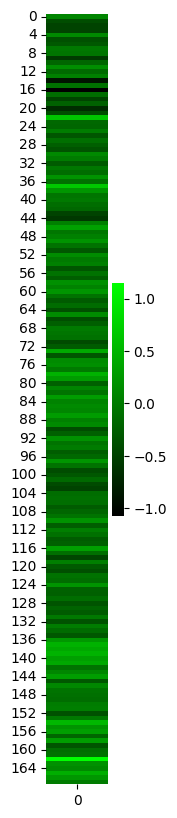

In [19]:
presentation_number = 0
presentation_data = benchmark_data.isel(presentation=presentation_number).values.reshape(-1,1)

from matplotlib.colors import LinearSegmentedColormap
colors = [(0, 0, 0), (0, 1, 0)]  # Black to pure green
n_bins = 256  # Number of gradients
custom_green = LinearSegmentedColormap.from_list("custom_green", colors, N=n_bins)

plt.figure(figsize=(1,10))
sns.heatmap(presentation_data, cmap=custom_green, cbar=True)


/Users/kartik/.brainio/stimulus_hvm-public/DTUG_L_rx+00.000_ry+00.000_rz+00.000_tx+00.000_ty+00.000_s+01.200_561c84a23fcc11df50a1c441a23d19cb48d35220_256x256.png
/Users/kartik/.brainio/stimulus_hvm-public/bear_rx+43.350_ry+109.925_rz+38.458_tx+00.068_ty+00.009_s+00.906_fb6ed66438deea7ed2b5a84f12994895ece657bb_256x256.png
/Users/kartik/.brainio/stimulus_hvm-public/MQUEEN_L_rx+13.671_ry-41.895_rz+23.853_tx-00.263_ty+00.549_s+01.154_bb78d80f3a0a3de1bdd88f9488c7a73dff136dac_256x256.png
/Users/kartik/.brainio/stimulus_hvm-public/Apricot_obj_rx-123.888_ry+36.120_rz+22.956_tx+00.139_ty+00.277_s+00.550_d9937e0d5705aa0e925f3cfbbc9b06b8f69c6514_256x256.png
/Users/kartik/.brainio/stimulus_hvm-public/_18_rx+03.190_ry-25.214_rz-37.944_tx-00.218_ty-00.292_s+00.758_01bfc6cdc7f2f266d9b7cf284ad5ee080d8c85cb_256x256.png
/Users/kartik/.brainio/stimulus_hvm-public/TURTLE_L_rx+12.604_ry+38.444_rz+35.021_tx-00.158_ty+00.291_s+00.670_c6ec7ca0f29395608a19a8bb8825258310845be8_256x256.png
/Users/kartik/.brainio

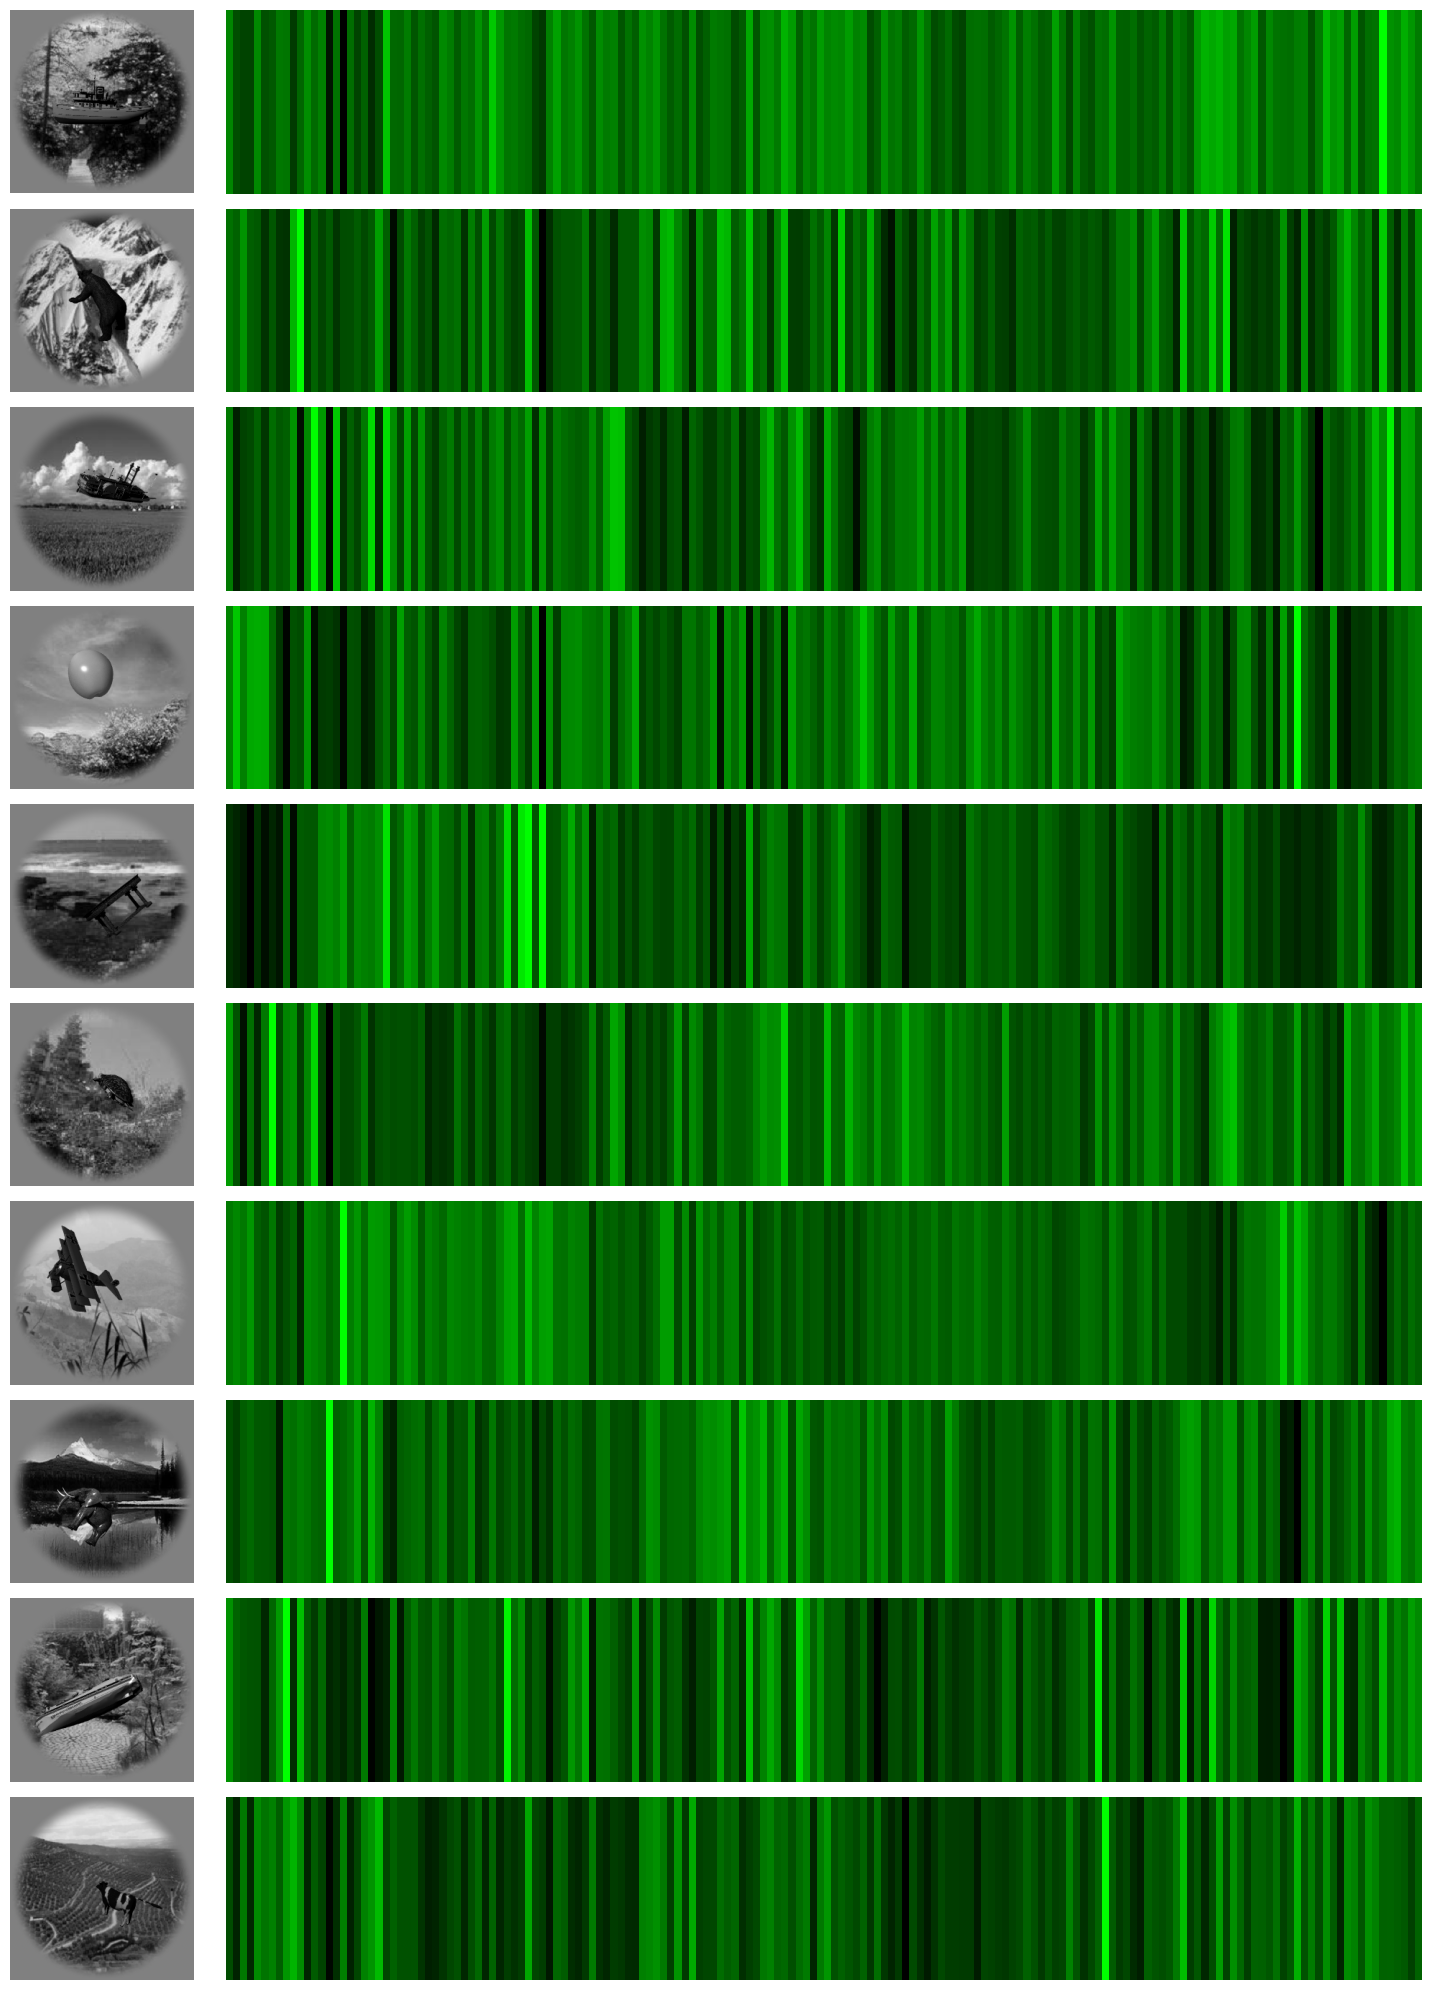

In [20]:
nPresentations = 10

# Create subplots
fig, axs = plt.subplots(nPresentations, 2, 
                        figsize=(15, nPresentations * 2),
                        gridspec_kw={'width_ratios': [1, 4]}) # Set the width of the plot

for data, stimulus_id, ax_row in zip(benchmark_data.values[0:nPresentations], benchmark_data['presentation']['stimulus_id'].values[0:nPresentations], axs):
    # Get and display the stimulus image
    stimulus_path = benchmark_data.attrs['stimulus_set'].get_stimulus(stimulus_id)
    print(stimulus_path)
    img = plt.imread(stimulus_path)
    # Left subplot: Image (1/5 width)
    ax_row[0].imshow(img)
    ax_row[0].axis('off')

    # Right subplot: Heatmap (4/5 width)
    sns.heatmap(data.reshape(1,-1), 
                cmap=custom_green, 
                ax=ax_row[1],
                cbar=False)
    
    # Remove ticks from heatmap
    ax_row[1].set_xticks([])
    ax_row[1].set_yticks([])

plt.tight_layout()
plt.show()



What Brain-Score will essentially do is iterate over the rows in the DataAssembly, look at `stimulus_id`, retrieve the stimulus from the StimulusSet, test the model on it, and retrieve the model's response. Repeat this X times, and then compare the model's response to the experimental data using the Metric.

# fMRI dataset

In [21]:
import brainscore_vision
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Here the data identifier can be used to easily load the data.
fmri_neural_data = brainscore_vision.load_dataset("Coggan2024_fMRI")
fmri_neural_data

brainscore-storage/brainio-brainscore/assy_tong_Coggan2024_fMRI.nc: 100%|██████████| 167k/167k [00:00<00:00, 869kB/s]
brainscore-storage/brainio-brainscore/stimulus_tong_Coggan2024_fMRI.csv: 100%|██████████| 2.98k/2.98k [00:00<00:00, 29.0kB/s]
brainscore-storage/brainio-brainscore/stimulus_tong_Coggan2024_fMRI.zip: 100%|██████████| 501k/501k [00:00<00:00, 1.83MB/s]


<xarray.NeuroidAssembly 'data' (presentation: 24, neuroid: 36)>
dask.array<open_dataset-6433ecbaef36a3a80112a66288a8d68fdata, shape=(24, 24, 36), dtype=float64, chunksize=(24, 24, 36), chunktype=numpy.ndarray>
Coordinates:
  * presentation                (presentation) MultiIndex
  - stimulus_id                 (presentation) object 'bear_complete' ... 'te...
  - object_name                 (presentation) object 'bear' 'bear' ... 'teapot'
  - occlusion_condition         (presentation) object 'complete' ... 'upper'
  - imagenet_class_name         (presentation) object 'n02132136' ... 'n04398...
  - filename                    (presentation) object 'bear_complete.png' ......
  - imagenet_class_description  (presentation) object 'brown bear, bruin, Urs...
  - imagenet_path               (presentation) object 'val/n02132136/ILSVRC20...
  - imagenet_class_index_1K     (presentation) int64 294 294 294 ... 849 849 849
  * neuroid                     (neuroid) MultiIndex
  - subject                     (neuroid) object 'sub-0' 'sub-1' ... 'sub-8'
  - region                      (neuroid) object 'V1' 'V1' 'V1' ... 'IT' 'IT'
Attributes:
    stimulus_set_identifier:  tong.Coggan2024_fMRI
    stimulus_set:                imagenet_class_name object_name occlusion_co...
    identifier:               tong.Coggan2024_fMRI

In [23]:
IT_fmri_neural_data = fmri_neural_data.sel(region='IT')
IT_fmri_neural_data

<xarray.NeuroidAssembly 'data' (presentation: 24, subject: 9)>
dask.array<getitem, shape=(24, 24, 9), dtype=float64, chunksize=(24, 24, 9), chunktype=numpy.ndarray>
Coordinates:
  * presentation                (presentation) MultiIndex
  - stimulus_id                 (presentation) object 'bear_complete' ... 'te...
  - object_name                 (presentation) object 'bear' 'bear' ... 'teapot'
  - occlusion_condition         (presentation) object 'complete' ... 'upper'
  - imagenet_class_name         (presentation) object 'n02132136' ... 'n04398...
  - filename                    (presentation) object 'bear_complete.png' ......
  - imagenet_class_description  (presentation) object 'brown bear, bruin, Urs...
  - imagenet_path               (presentation) object 'val/n02132136/ILSVRC20...
  - imagenet_class_index_1K     (presentation) int64 294 294 294 ... 849 849 849
  * subject                     (subject) object 'sub-0' 'sub-1' ... 'sub-8'
Attributes:
    stimulus_set_identifier:  tong.Coggan2024_fMRI
    stimulus_set:                imagenet_class_name object_name occlusion_co...
    identifier:               tong.Coggan2024_fMRI

In [24]:
IT_fmri_neural_data['region'] = ('subject', ['IT'] * len(IT_fmri_neural_data['subject']))
IT_fmri_neural_data


<xarray.NeuroidAssembly 'data' (presentation: 24, subject: 9)>
dask.array<getitem, shape=(24, 24, 9), dtype=float64, chunksize=(24, 24, 9), chunktype=numpy.ndarray>
Coordinates:
  * presentation                (presentation) MultiIndex
  - stimulus_id                 (presentation) object 'bear_complete' ... 'te...
  - object_name                 (presentation) object 'bear' 'bear' ... 'teapot'
  - occlusion_condition         (presentation) object 'complete' ... 'upper'
  - imagenet_class_name         (presentation) object 'n02132136' ... 'n04398...
  - filename                    (presentation) object 'bear_complete.png' ......
  - imagenet_class_description  (presentation) object 'brown bear, bruin, Urs...
  - imagenet_path               (presentation) object 'val/n02132136/ILSVRC20...
  - imagenet_class_index_1K     (presentation) int64 294 294 294 ... 849 849 849
  * subject                     (subject) object 'sub-0' 'sub-1' ... 'sub-8'
    region                      (subject) <U2 'IT' 'IT' 'IT' ... 'IT' 'IT' 'IT'
Attributes:
    stimulus_set_identifier:  tong.Coggan2024_fMRI
    stimulus_set:                imagenet_class_name object_name occlusion_co...
    identifier:               tong.Coggan2024_fMRI

In [25]:
for coord_name in fmri_neural_data.coords:
    coord = fmri_neural_data.coords[coord_name]
    print(f"Coordinate: {coord_name}")
    print(f"Shape: {coord.shape}")
    print(f"Data type: {coord.dtype}")
    if hasattr(coord, 'levels'):  # Check if it's a MultiIndex
        print("MultiIndex levels:")
        for level in coord.levels:
            print(f"  - {level.name}: {level.dtype}")
    print("Sample values:", coord.values[:3])  # Show first 3 values
    print("---")

Coordinate: presentation
Shape: (24,)
Data type: object
Sample values: [('bear_complete', 'bear', 'complete', 'n02132136', 'bear_complete.png', 'brown bear, bruin, Ursus arctos', 'val/n02132136/ILSVRC2012_val_00049345.jpg', 294)
 ('bear_lower', 'bear', 'lower', 'n02132136', 'bear_lower.png', 'brown bear, bruin, Ursus arctos', 'val/n02132136/ILSVRC2012_val_00049345.jpg', 294)
 ('bear_upper', 'bear', 'upper', 'n02132136', 'bear_upper.png', 'brown bear, bruin, Ursus arctos', 'val/n02132136/ILSVRC2012_val_00049345.jpg', 294)]
---
Coordinate: neuroid
Shape: (36,)
Data type: object
Sample values: [('sub-0', 'V1') ('sub-1', 'V1') ('sub-2', 'V1')]
---


In [26]:
fmri_neural_data.values

array([[[ 0.37354658,  0.1347551 ,  0.19103563, ...,  0.02945603,
          0.04641905, -0.10725214],
        [-0.20101344,  0.3202708 ,  0.07466035, ..., -0.03949078,
          0.09540891,  0.0482964 ],
        [ 0.20194419,  0.05544821,  0.1265397 , ..., -0.1069846 ,
          0.06861598,  0.08798615],
        ...,
        [ 0.0697403 ,  0.02621156, -0.16429072, ..., -0.03122457,
          0.07892272, -0.05286657],
        [-0.27208995, -0.25784435, -0.09103628, ...,  0.04479709,
         -0.04933475, -0.04735401],
        [ 0.13363461, -0.09999546,  0.08330032, ..., -0.09228356,
         -0.11074285, -0.10039851]],

       [[-0.06219436,  0.19003036,  0.11950615, ...,  0.02542182,
          0.03684799,  0.0011265 ],
        [ 0.29800736,  0.25107847, -0.04216352, ...,  0.33795418,
          0.06991025,  0.05553779],
        [-0.00261025,  0.08283537, -0.0841653 , ...,  0.12029341,
         -0.0124799 ,  0.11908812],
        ...,
        [-0.20559525,  0.03345882,  0.15343448, ..., -

# Sanghavi

In [27]:
import brainscore_vision
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
neural_data = brainscore_vision.load_dataset("Sanghavi2020")
neural_data

Exception: [NoCredentialsError('Unable to locate credentials'), ClientError('An error occurred (403) when calling the HeadObject operation: Forbidden')]

In [79]:
print(f"The number of unique stimuli: {len(set(neural_data['stimulus_id'].values))}")
print(f"The number of unique category_name: {len(set(neural_data['category_name'].values))}")
print(f"The number of unique NHPs: {len(set(neural_data['animal'].values))}")
print(f"The number of unique brain regions: {len(set(neural_data['region'].values))}")
print(f"The number of observations: {len(neural_data)}")

The number of unique stimuli: 5760
The number of unique category_name: 8
The number of unique NHPs: 1
The number of unique brain regions: 2
The number of observations: 161280


In [106]:
IT_data = neural_data.sel(region='IT')
IT_data


<xarray.NeuronRecordingAssembly 'dicarlo.Sanghavi2020' (presentation: 161280,
                                                        neuroid: 88, time_bin: 7)>
dask.array<getitem, shape=(161280, 88, 7), dtype=float64, chunksize=(161280, 88, 7), chunktype=numpy.ndarray>
Coordinates:
  * presentation     (presentation) MultiIndex
  - image_id         (presentation) object '8a72e2bfdb8c267b57232bf96f069374d...
  - size             (presentation) float64 256.0 256.0 256.0 ... 256.0 256.0
  - rxz              (presentation) float64 0.0 0.0 0.0 ... -25.15 -25.15 -25.15
  - rxy_semantic     (presentation) float64 90.0 90.0 90.0 ... -67.47 -67.47
  - image_file_name  (presentation) object 'astra_rx+00.000_ry+00.000_rz+00.0...
  - object_name      (presentation) object 'car_astra' 'car_astra' ... 'apricot'
  - background_id    (presentation) object 'ecd40f3f6d7a4d6d88134d648884e0b9b...
  - rxy              (presentation) float64 -0.0 -0.0 -0.0 ... -67.47 -67.47
  - s                (presentation) float64 1.0 1.0 1.0 1.0 ... 1.05 1.05 1.05
  - tz               (presentation) float64 0.0 0.0 0.0 ... 0.187 0.187 0.187
  - id               (presentation) int64 1 1 1 1 1 ... 5760 5760 5760 5760 5760
  - ryz_semantic     (presentation) float64 -0.0 -0.0 -0.0 ... 7.598 7.598 7.598
  - ryz              (presentation) float64 -0.0 -0.0 -0.0 ... 7.598 7.598 7.598
  - ty               (presentation) float64 0.0 0.0 0.0 ... 0.049 0.049 0.049
  - category_name    (presentation) object 'Cars' 'Cars' ... 'Fruits' 'Fruits'
  - filename         (presentation) object '8a72e2bfdb8c267b57232bf96f069374d...
  - rxz_semantic     (presentation) float64 0.0 0.0 0.0 ... -25.15 -25.15 -25.15
  - variation        (presentation) int64 0 0 0 0 0 0 0 0 0 ... 6 6 6 6 6 6 6 6
  - image            (presentation) int64 0 0 0 0 0 ... 5759 5759 5759 5759 5759
  - repetition       (presentation) int64 0 1 2 3 4 5 6 ... 21 22 23 24 25 26 27
  - stimulus_id      (presentation) object '8a72e2bfdb8c267b57232bf96f069374d...
  * neuroid          (neuroid) MultiIndex
  - col              (neuroid) int64 2 1 3 4 4 7 6 6 8 8 ... 3 3 4 5 5 6 7 7 9 8
  - row              (neuroid) int64 9 9 9 9 7 9 8 7 5 4 ... 0 1 1 1 0 0 0 1 0 0
  - bank             (neuroid) object 'A' 'A' 'A' 'A' 'A' ... 'F' 'F' 'F' 'F'
  - elec             (neuroid) object '000' '001' '002' ... '029' '030' '031'
  - label            (neuroid) object 'elec78' 'elec88' ... 'elec1' 'elec9'
  - arr              (neuroid) object '2034' '2034' '2034' ... '2039' '2039'
  - hemisphere       (neuroid) object 'L' 'L' 'L' 'L' 'L' ... 'L' 'L' 'L' 'L'
  - subregion        (neuroid) object 'cIT' 'cIT' 'cIT' ... 'pIT' 'pIT' 'pIT'
  - animal           (neuroid) object 'Solo' 'Solo' 'Solo' ... 'Solo' 'Solo'
  - neuroid_id       (neuroid) object 'A-000' 'A-001' ... 'F-030' 'F-031'
  * time_bin         (time_bin) MultiIndex
  - time_bin_id      (time_bin) int64 0 1 2 3 4 5 6
  - time_bin_start   (time_bin) int64 70 170 50 100 150 200 70
  - time_bin_stop    (time_bin) int64 170 270 100 150 200 250 270
Attributes:
    image_size_degree:        8
    stim_on_time_ms:          100
    stimulus_set_identifier:  hvm
    stimulus_set:                     id                             backgrou...
    identifier:               dicarlo.Sanghavi2020

In [107]:
from brainscore_vision.benchmark_helpers.neural_common import average_repetition
IT_data['region'] = 'neuroid', ['IT'] * len(IT_data['neuroid'])

In [108]:
IT_data = IT_data.sel(time_bin_id=0)

In [109]:
IT_data

<xarray.NeuronRecordingAssembly 'dicarlo.Sanghavi2020' (presentation: 161280,
                                                        neuroid: 88, time_bin: 1)>
dask.array<getitem, shape=(161280, 88, 1), dtype=float64, chunksize=(161280, 88, 1), chunktype=numpy.ndarray>
Coordinates:
  * presentation     (presentation) MultiIndex
  - image_id         (presentation) object '8a72e2bfdb8c267b57232bf96f069374d...
  - size             (presentation) float64 256.0 256.0 256.0 ... 256.0 256.0
  - rxz              (presentation) float64 0.0 0.0 0.0 ... -25.15 -25.15 -25.15
  - rxy_semantic     (presentation) float64 90.0 90.0 90.0 ... -67.47 -67.47
  - image_file_name  (presentation) object 'astra_rx+00.000_ry+00.000_rz+00.0...
  - object_name      (presentation) object 'car_astra' 'car_astra' ... 'apricot'
  - background_id    (presentation) object 'ecd40f3f6d7a4d6d88134d648884e0b9b...
  - rxy              (presentation) float64 -0.0 -0.0 -0.0 ... -67.47 -67.47
  - s                (presentation) float64 1.0 1.0 1.0 1.0 ... 1.05 1.05 1.05
  - tz               (presentation) float64 0.0 0.0 0.0 ... 0.187 0.187 0.187
  - id               (presentation) int64 1 1 1 1 1 ... 5760 5760 5760 5760 5760
  - ryz_semantic     (presentation) float64 -0.0 -0.0 -0.0 ... 7.598 7.598 7.598
  - ryz              (presentation) float64 -0.0 -0.0 -0.0 ... 7.598 7.598 7.598
  - ty               (presentation) float64 0.0 0.0 0.0 ... 0.049 0.049 0.049
  - category_name    (presentation) object 'Cars' 'Cars' ... 'Fruits' 'Fruits'
  - filename         (presentation) object '8a72e2bfdb8c267b57232bf96f069374d...
  - rxz_semantic     (presentation) float64 0.0 0.0 0.0 ... -25.15 -25.15 -25.15
  - variation        (presentation) int64 0 0 0 0 0 0 0 0 0 ... 6 6 6 6 6 6 6 6
  - image            (presentation) int64 0 0 0 0 0 ... 5759 5759 5759 5759 5759
  - repetition       (presentation) int64 0 1 2 3 4 5 6 ... 21 22 23 24 25 26 27
  - stimulus_id      (presentation) object '8a72e2bfdb8c267b57232bf96f069374d...
  * neuroid          (neuroid) MultiIndex
  - col              (neuroid) int64 2 1 3 4 4 7 6 6 8 8 ... 3 3 4 5 5 6 7 7 9 8
  - row              (neuroid) int64 9 9 9 9 7 9 8 7 5 4 ... 0 1 1 1 0 0 0 1 0 0
  - bank             (neuroid) object 'A' 'A' 'A' 'A' 'A' ... 'F' 'F' 'F' 'F'
  - elec             (neuroid) object '000' '001' '002' ... '029' '030' '031'
  - label            (neuroid) object 'elec78' 'elec88' ... 'elec1' 'elec9'
  - arr              (neuroid) object '2034' '2034' '2034' ... '2039' '2039'
  - hemisphere       (neuroid) object 'L' 'L' 'L' 'L' 'L' ... 'L' 'L' 'L' 'L'
  - subregion        (neuroid) object 'cIT' 'cIT' 'cIT' ... 'pIT' 'pIT' 'pIT'
  - animal           (neuroid) object 'Solo' 'Solo' 'Solo' ... 'Solo' 'Solo'
  - neuroid_id       (neuroid) object 'A-000' 'A-001' ... 'F-030' 'F-031'
  * time_bin         (time_bin) MultiIndex
  - time_bin_start   (time_bin) int64 70
  - time_bin_stop    (time_bin) int64 170
    region           (neuroid) <U2 'IT' 'IT' 'IT' 'IT' ... 'IT' 'IT' 'IT' 'IT'
Attributes:
    image_size_degree:        8
    stim_on_time_ms:          100
    stimulus_set_identifier:  hvm
    stimulus_set:                     id                             backgrou...
    identifier:               dicarlo.Sanghavi2020

In [110]:
IT_data = IT_data.squeeze('time_bin')


In [111]:
print(f"The number of trials: {len(np.unique(IT_data.coords['repetition']))}")
print(f"The visual degrees: {IT_data.attrs['image_size_degree']}")

The number of trials: 28
The visual degrees: 8


In [112]:
benchmark_data = average_repetition(IT_data)

/Users/kartik/.brainio/stimulus_hvm/DTUG_L_rx+00.000_ry+00.000_rz+00.000_tx+00.000_ty+00.000_s+01.200_561c84a23fcc11df50a1c441a23d19cb48d35220_256x256.png
/Users/kartik/.brainio/stimulus_hvm/_44_rx-86.982_ry-46.751_rz-88.925_tx-00.142_ty+01.150_s+00.836_87865e860dd4c459a02e616627dd8996eb377677_256x256.png
/Users/kartik/.brainio/stimulus_hvm/bear_rx+43.350_ry+109.925_rz+38.458_tx+00.068_ty+00.009_s+00.906_fb6ed66438deea7ed2b5a84f12994895ece657bb_256x256.png
/Users/kartik/.brainio/stimulus_hvm/face0004_rx-67.736_ry+78.812_rz-89.441_tx+00.268_ty-00.651_s+01.043_ad21cfc1af949d98d049bec26f2bd5b2bcd383a9_256x256.png
/Users/kartik/.brainio/stimulus_hvm/face0002_rx+86.253_ry+85.611_rz-04.493_tx-00.283_ty+00.114_s+00.926_76c1a26b5e4f713dfe79798d5c9e17e14468c8a8_256x256.png
/Users/kartik/.brainio/stimulus_hvm/MQUEEN_L_rx+13.671_ry-41.895_rz+23.853_tx-00.263_ty+00.549_s+01.154_bb78d80f3a0a3de1bdd88f9488c7a73dff136dac_256x256.png
/Users/kartik/.brainio/stimulus_hvm/Apricot_obj_rx-123.888_ry+36.120

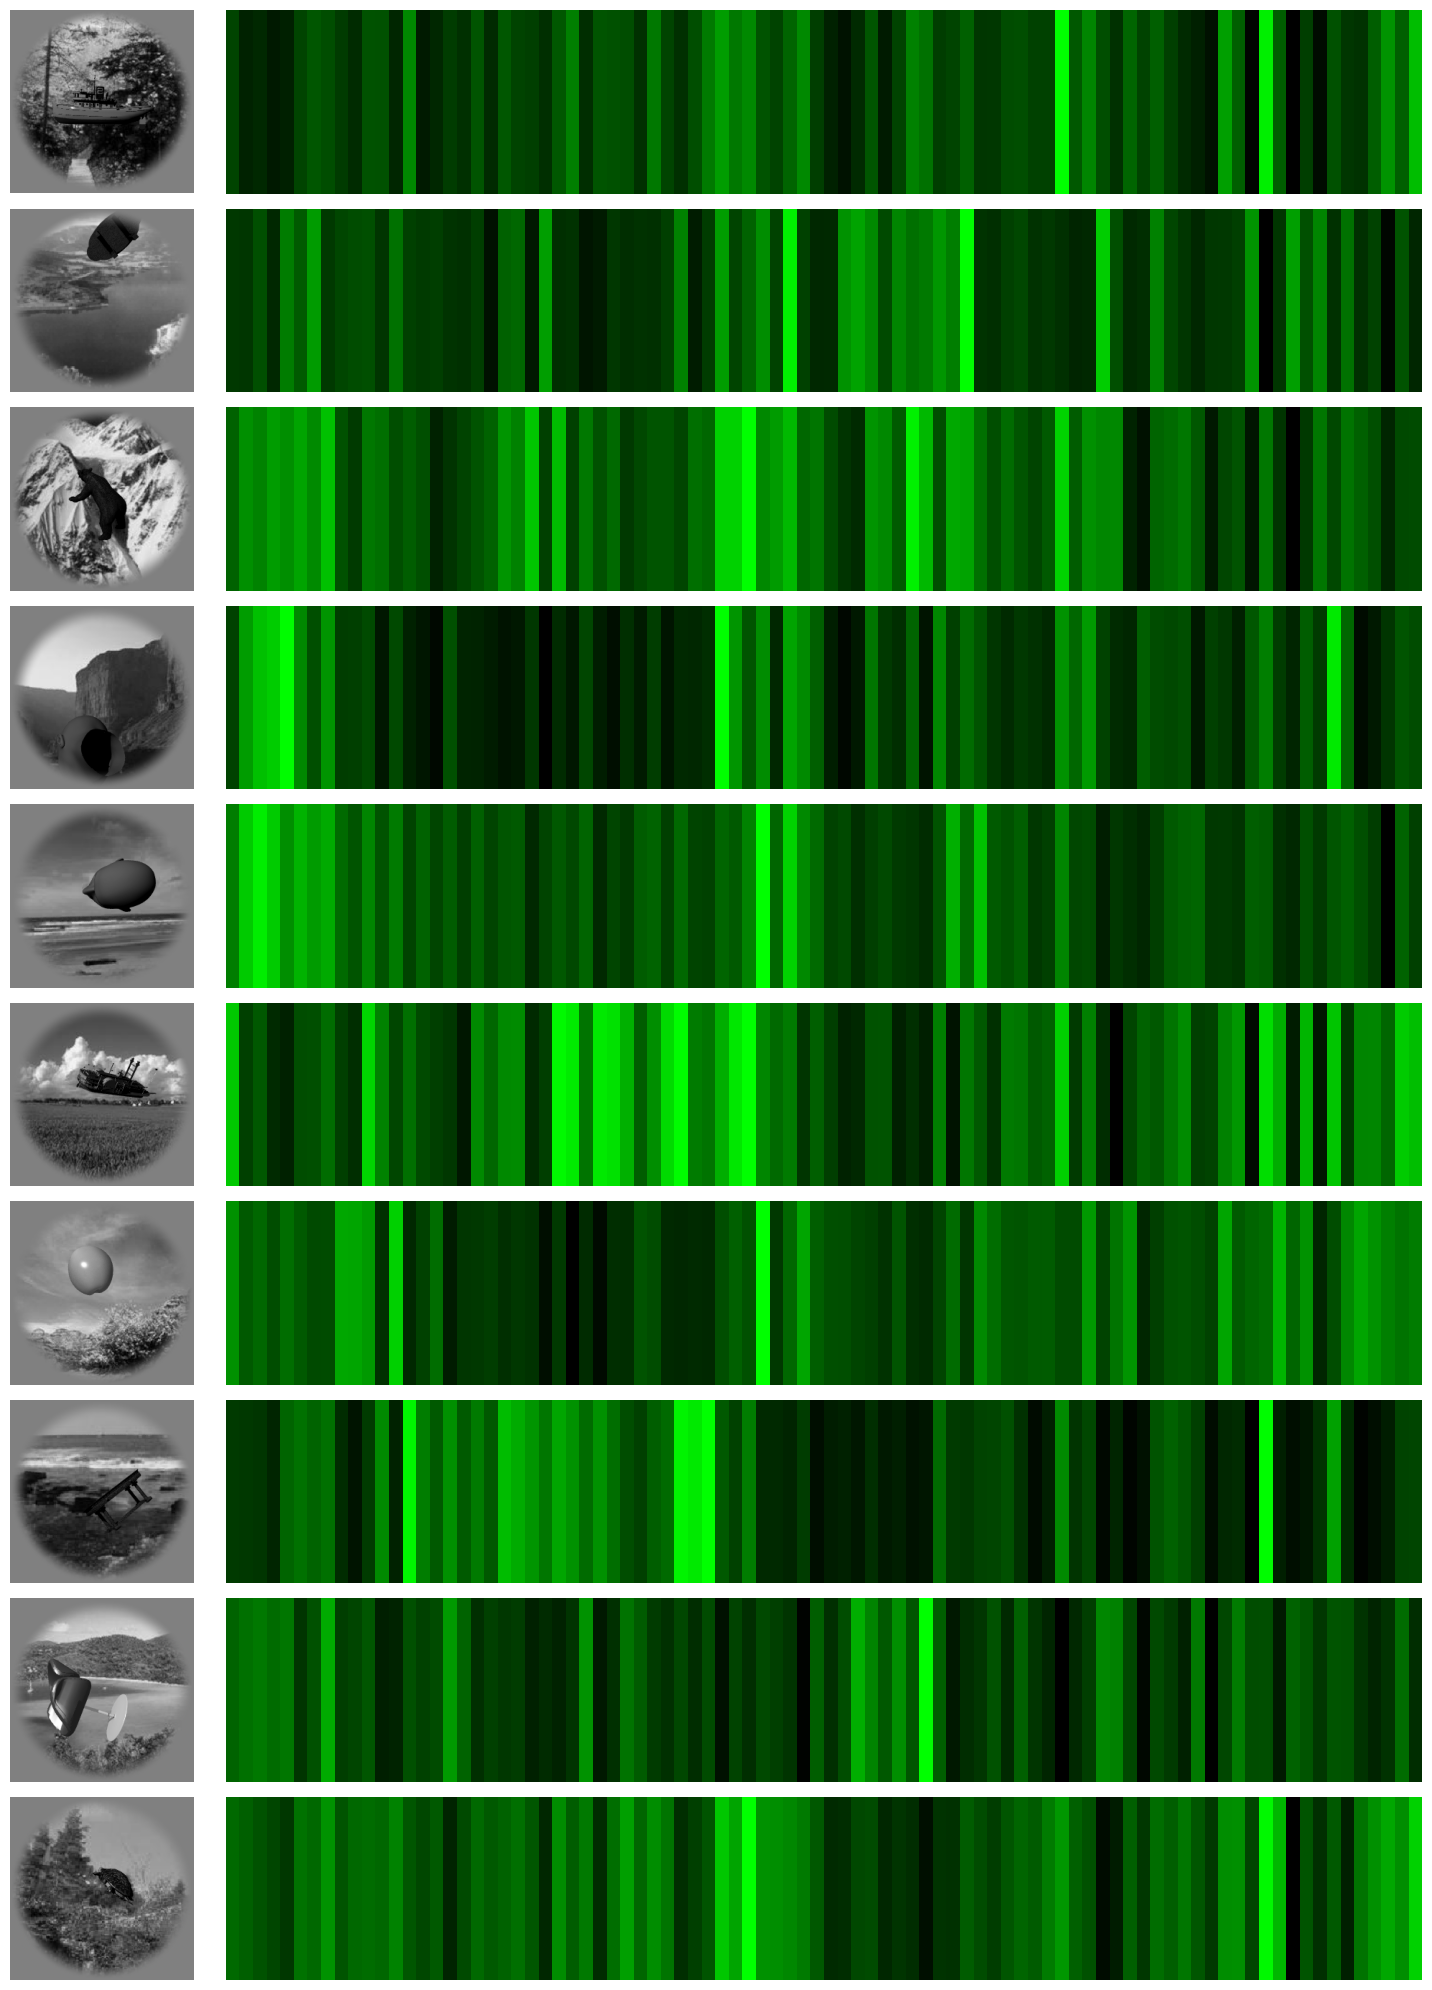

In [113]:
nPresentations = 10

# Create subplots
fig, axs = plt.subplots(nPresentations, 2, 
                        figsize=(15, nPresentations * 2),
                        gridspec_kw={'width_ratios': [1, 4]}) # Set the width of the plot

for data, stimulus_id, ax_row in zip(benchmark_data.values[0:nPresentations], benchmark_data['presentation']['stimulus_id'].values[0:nPresentations], axs):
    # Get and display the stimulus image
    stimulus_path = benchmark_data.attrs['stimulus_set'].get_stimulus(stimulus_id)
    print(stimulus_path)
    img = plt.imread(stimulus_path)
    # Left subplot: Image (1/5 width)
    ax_row[0].imshow(img)
    ax_row[0].axis('off')

    # Right subplot: Heatmap (4/5 width)
    sns.heatmap(data.reshape(1,-1), 
                cmap=custom_green, 
                ax=ax_row[1],
                cbar=False)
    
    # Remove ticks from heatmap
    ax_row[1].set_xticks([])
    ax_row[1].set_yticks([])

plt.tight_layout()
plt.show()